# Meta learning and baseline comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator

## Macros

In [2]:
META_LABEL_METRIC = "precision"
META_MODEL = "LGBMRegressor"
BASE_MODEL = "RandomForestClassifier"
DATASET = "electricity"
FILENAME = f"metabases/metamodel: {META_MODEL} - basemodel: {BASE_MODEL} - metric: {META_LABEL_METRIC} - dataset: {DATASET}.csv"
FILENAME

'metabases/metamodel: LGBMRegressor - basemodel: RandomForestClassifier - metric: precision - dataset: electricity.csv'

In [3]:
META_LEARNING_COL = "meta_learning"
BASELINE_COL = "baseline"
TARGET_COL = "target"

## Read data

In [4]:
df = pd.read_csv(FILENAME).dropna()
df = df.rename(columns={"predicted": META_LEARNING_COL, f"last_{META_LABEL_METRIC}": BASELINE_COL, META_LABEL_METRIC: TARGET_COL})
df = df[[TARGET_COL, META_LEARNING_COL, BASELINE_COL]]
df.head()

,target,meta_learning,baseline
344,0.608247,0.672167,0.700000
345,0.468085,0.693424,0.637363
346,0.476744,0.731969,0.797872
355,1.000000,0.788552,0.938272
356,1.000000,0.771095,0.941176


In [5]:
y_true = df[TARGET_COL]
y_pred = df[META_LEARNING_COL]
y_baseline = df[BASELINE_COL]

Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)


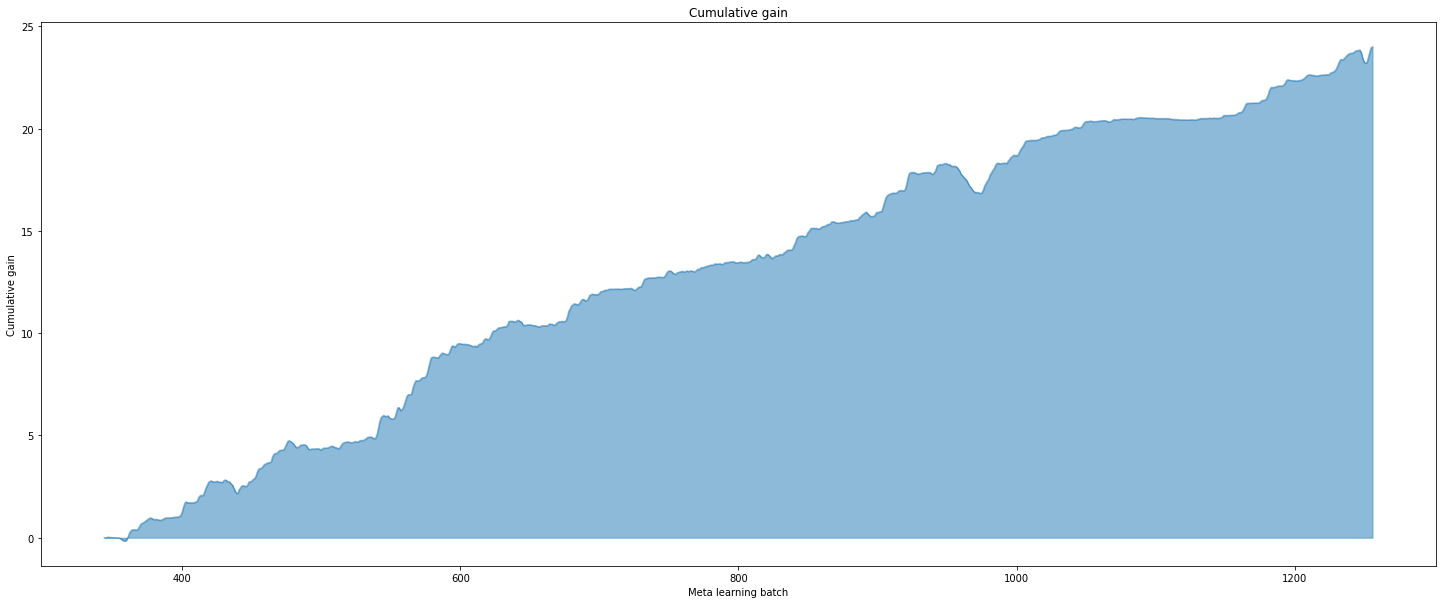

In [6]:
evaluator.cumulative_gain(y_true, y_pred, y_baseline)

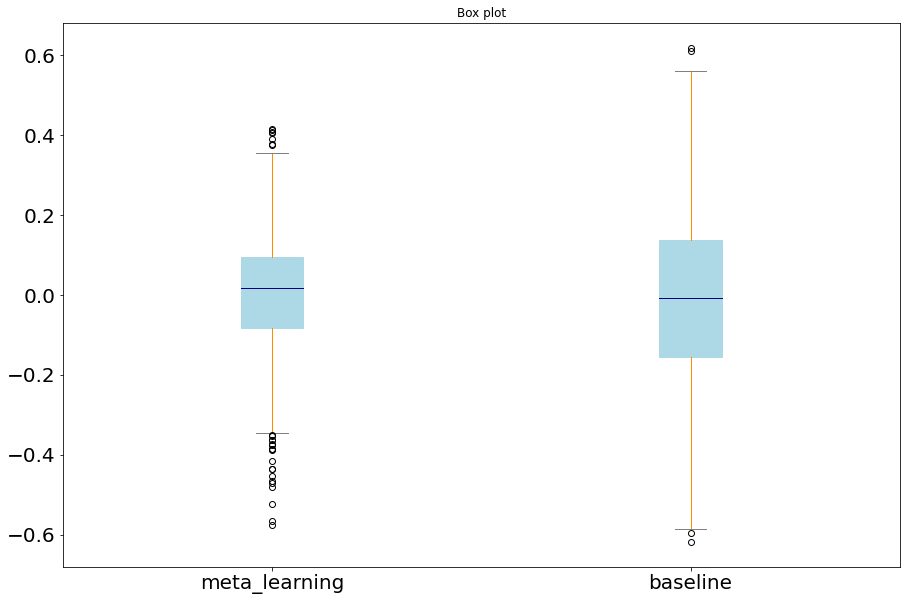

In [7]:
evaluator.box_plot(df, TARGET_COL, [META_LEARNING_COL, BASELINE_COL])

In [8]:
baseline_result = evaluator.get_regression_metrics(y_true, y_baseline)
mtl_result = evaluator.get_regression_metrics(y_true, y_pred)
results = pd.DataFrame([
    {**baseline_result, "type": "baseline"},
    {**mtl_result, "type": "metalearning"}
])
results = pd.melt(results, id_vars=["type"], value_vars=evaluator.reg_metrics)
results

,type,variable,value
0,baseline,r2,-0.379653
1,metalearning,r2,0.365354
2,baseline,mse,0.049089
3,metalearning,mse,0.022581
4,baseline,std,0.221494
5,metalearning,std,0.150269


(array([0, 1, 2]), [Text(0, 0, 'r2'), Text(1, 0, 'mse'), Text(2, 0, 'std')])

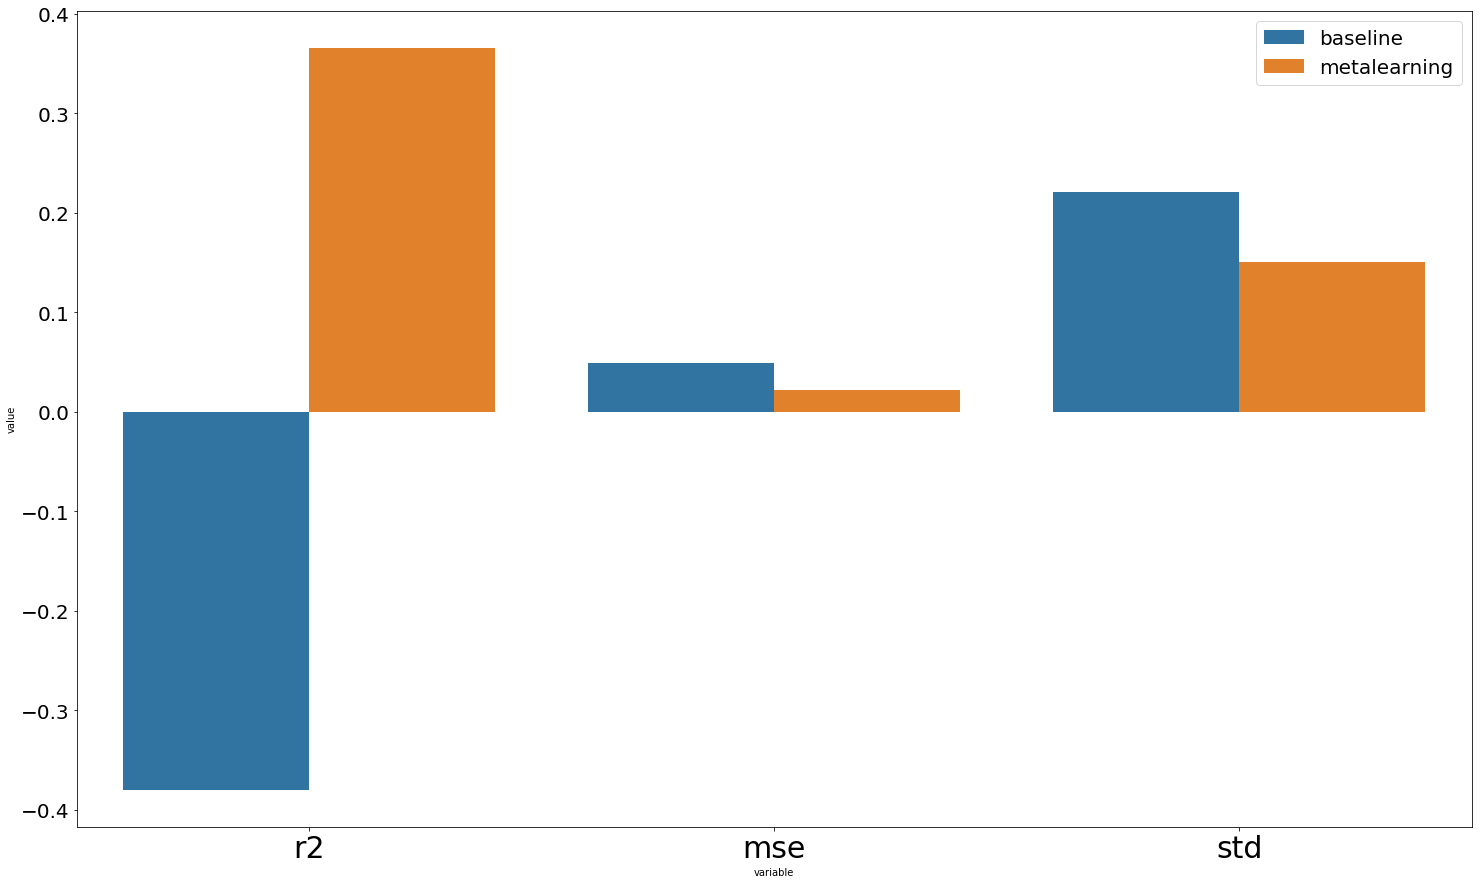

In [9]:
plt.figure(figsize=(25, 15))
sns.barplot(x="variable", hue="type", y="value", data=results)
plt.legend(prop={'size': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=30)